In [ ]:
import sys
sys.path.append('../src')

In [1]:
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
with open("../data/train_data_final.pkl", "rb") as f:
    loaded_data = pd.read_pickle(f)

df = loaded_data[0]


df_abbrev = pd.read_csv('../data/Qualified abbreviations_20220718.csv', low_memory=False,index_col=0, sep=';')

print("\nA Dataframe with", len(df), "entries has been loaded")


A Dataframe with 97417 entries has been loaded


In [4]:
df_abbrev.columns

Index(['Original order', 'ASRS Abbreviations Decode', 'Note',
       'Pos du 1er séparateur = " " ou "(" si existe', 'Abbreviation',
       '# Abreviation letters', 'Forms (entre parenthèses)',
       'Abbreviation + Forms', 'Full-Text', '#Words',
       '# Abbrev letters = #Words ?', 'Category', 'Forms to parse',
       'Note from Yannis', 'Treat with ReGex', 'Replacement string',
       'Treat as Contraction / Expression', 'Category2'],
      dtype='object')

In [5]:
df_abbrev.head()

,Original order,ASRS Abbreviations Decode,Note,"Pos du 1er séparateur = "" "" ou ""("" si existe",Abbreviation,# Abreviation letters,Forms (entre parenthèses),Abbreviation + Forms,Full-Text,#Words,# Abbrev letters = #Words ?,Category,Forms to parse,Note from Yannis,Treat with ReGex,Replacement string,Treat as Contraction / Expression,Category2
ID,,,,,,,,,,,,,,,,,,
1,2.0,E East,"Split from N,S,E,W",2.0,E,1.0,NaN,E,East,1.0,L=W,1 letter,NaN,"Ambiguity of meaning ""Class E airspace""",0,NaN,0,NaN
2,311.0,N North,"Split from N,S,E,W",2.0,N,1.0,NaN,N,North,1.0,L=W,1 letter,NaN,"Ambiguity of meaning ""the N coordinates""",0,NaN,0,NaN
3,387.0,S South,"Split from N,S,E,W",2.0,S,1.0,NaN,S,South,1.0,L=W,1 letter,NaN,"Ambiguity of meaning ""S Turn"" , ""Taxiway S""",0,NaN,0,NaN
4,451.0,W West,"Split from N,S,E,W",2.0,W,1.0,NaN,W,West,1.0,L=W,1 letter,NaN,"Ambiguity of meaning ""Air carrier W""",0,NaN,0,NaN
5,366.0,R Right,split from L/R,2.0,R,1.0,NaN,R,Right,1.0,L=W,1 letter,NaN,ReGex for Runway,1,""" <RUNWAY> """,0,NaN


In [6]:
Narrative =  df['Narrative']


In [80]:
#!!pip install tqdm
from tqdm import tqdm

# Import data and add white spaces 
df_abbrev_short = df_abbrev[["Abbreviation", "Full-Text"]]

# Add white space to the abbreviations
def add_whitespace(word):
    return f" {word} "

df_abbrev_short['Abbreviation'] = df_abbrev_short['Abbreviation'].apply(add_whitespace)
df_abbrev_short["Full-Text"] = df_abbrev_short["Full-Text"].apply(add_whitespace)

updates_count = 0
total_rows = len(Narrative)

# Function to replace abbreviations with full text
def replace_abbreviations(text):
    global updates_count
    for index, row in df_abbrev_short.iterrows():
        text = text.replace(row['Abbreviation'], row['Full-Text'])
    updates_count = updates_count + 1
        
    if updates_count % 100 == 0 or updates_count == total_rows:
        tqdm.write(f"Processed: {updates_count}/{total_rows}")
    return text

# Apply the function to the Narrative texts
Narrative_short = Narrative.iloc[1:10]
Narrative_abb = Narrative_short.apply(replace_abbreviations)

# Print the result
print(Narrative_short)
print(Narrative_abb)


ACN
893734     We had 6 shipments of dry ice for the flight; ...
991883     I have seen a lot of mistakes on every flight ...
1590076    It was my first time flying into KEUG and I wa...
1715282    I am writing this report to bring attention to...
1672702    Could not physically recover from the previous...
1206559    I was attempting to complete my preflight secu...
1237532    Aircraft X was inbound to BUR on the ILS and h...
1079741    Hot Spring airport conducted an open house. Th...
949631     I was the pilot not flying and the Captain was...
Name: Narrative, dtype: object
ACN
893734     We had 6 shipments of dry ice for the flight; ...
991883     I have seen a lot of mistakes on every flight ...
1590076    It was my first time flying into KEUG and I wa...
1715282    I am writing this report to bring attention to...
1672702    Could not physically recover from the previous...
1206559    I was attempting to complete my preflight secu...
1237532    Aircraft X was inbound to BUR on th

/tmp/ipykernel_8422/2875062271.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abbrev_short['Abbreviation'] = df_abbrev_short['Abbreviation'].apply(add_whitespace)
/tmp/ipykernel_8422/2875062271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abbrev_short["Full-Text"] = df_abbrev_short["Full-Text"].apply(add_whitespace)


In [52]:
#!pip install nltk
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import re


[nltk_data] Downloading package punkt to /home/ensai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ensai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    # Remove punctuation
    text_no_punc = re.sub('[^\w\s]', '', text)

    # Tokenize words
    word_tokenized = word_tokenize(text_no_punc)

    # Remove stopwords
    text_filtered = ' '.join([w for w in word_tokenized if not w in stop_words])

    return text_filtered

Narrative_abb2 = Narrative_abb.apply(preprocess_text)
print(Narrative_abb.iloc[0])
print(Narrative_abb2)

We had 6 shipments of dry ice for the flight; cooling fresh produce.  The paper Dangerous Goods form listed the proper shipping name as 'Dry Ice (Fresh Produce)'.  On the Automatic Communications Addressing and Reporting System Dangerous Goods pilot not flying; the Shipping Name for each of the six shipments was listed as 'Fresh Produce'.  'Fresh Produce' is obviously not a regulated material and is not a correct proper shipping name; the entry should have reflected the dry ice.
ACN
893734     We 6 shipments dry ice flight cooling fresh pr...
991883     I seen lot mistakes every flight since changed...
1590076    It first time flying KEUG I pilot flying The w...
1715282    I writing report bring attention second depart...
1672702    Could physically recover previous days gruelin...
1206559    I attempting complete preflight security check...
1237532    Aircraft X inbound BUR Instrument Landing Syst...
1079741    Hot Spring airport conducted open house There ...
949631     I pilot flyin

In [80]:
print(Narrative_abb)
print(Narrative)

ACN
1163382    I was the robbert flying performing the takeof...
893734     Weste had 6 shipments of dry ice for the fligh...
991883     I have seen a lot of mistakes on every flight ...
1590076    It was my first time flying into KEastUWind in...
1715282    I am writing this report to bring attention to...
                                 ...                        
622204     WestEast WestEastRightEast EastNorthRightTEast...
622205     CelsiusLeftRightEastD BY TWestRight CelsiusTLe...
661202     WestHILeftEast WestORightKINorthWind indicatio...
733747     ONorth MachIdentificationNorthIWind indication...
874642     I was working the FahrenheitD/CelsiusD (Fahren...
Name: Narrative, Length: 97417, dtype: object
ACN
1163382    I was the robbert flying performing the takeof...
893734     We had 6 shipments of dry ice for the flight; ...
991883     I have seen a lot of mistakes on every flight ...
1590076    It was my first time flying into KEUG and I wa...
1715282    I am writing this re

In [11]:
# Check the length of the first narrative

first_narrative = Narrative.iloc[0]
print(first_narrative)
stem = first_narrative.split()
print(len(stem))

I was the pilot flying performing the takeoff. During the takeoff roll the Captain called '80 KTS' and then leaned forward and deactivated the autobrakes from 'RTO' to 'OFF' and stated 'My Aircraft' 'Aborting Takeoff'. The Captain then closed the throttles; moved them into 'REV' and spoilers deployed. I noted 110 KTS on the airspeed ribbon and held the yoke forward; called deployed and no autobrakes. I inform the Tower that we were aborting the takeoff. The Captain stated that during airspeed crosscheck he noted that the standby airspeed indicated had not moved off its parked position of 30 KTS. The deceleration was very gentle and there appeared to be; and felt as if no heavy braking if any braking was taking place. The Captain said that he was not using brakes or very little braking. We rolled to end of the runway and exited.The Tower asked if we needed assistance and the Captain said no. On exiting the runway; I informed Ground that we will be returning to the gate and they too aske

In [12]:
targets = df['Anomaly']
targets

ACN
1163382    Aircraft Equipment Problem Critical; Deviation...
893734     Deviation / Discrepancy - Procedural Hazardous...
991883     Deviation / Discrepancy - Procedural Published...
1590076               Inflight Event / Encounter CFTT / CFIT
1715282                                  ATC Issue All Types
                                 ...                        
622204     ATC Issue All Types; Conflict Airborne Conflic...
622205     Conflict Ground Conflict; Critical; Ground Inc...
661202       ATC Issue All Types; Conflict Airborne Conflict
733747                                    Other ATOP Failure
874642     Deviation - Track / Heading All Types; Deviati...
Name: Anomaly, Length: 97417, dtype: object

In [13]:
# Check the labels of the first target
first_target = targets.iloc[0]
print(first_target)
print('List from of first target: ', first_target.split(';'))


Aircraft Equipment Problem Critical; Deviation / Discrepancy - Procedural Published Material / Policy
List from of first target:  ['Aircraft Equipment Problem Critical', ' Deviation / Discrepancy - Procedural Published Material / Policy']


In [14]:
# Identifying columns that appear to be narrative fields
narrative_columns = [col for col in df.columns if 'Narrative' in col]

# Filter out the narrative columns for analysis
narrative_data = df[narrative_columns]

# Display the filtered narrative columns and their first few entries
narrative_data.head()


,Narrative,Narrative.1
ACN,,
1163382,I was the pilot flying performing the takeoff....,At approximately 75 KTS I glanced at my airspe...
893734,We had 6 shipments of dry ice for the flight; ...,NaN
991883,I have seen a lot of mistakes on every flight ...,NaN
1590076,It was my first time flying into KEUG and I wa...,Night VMC visual approach left base leg into E...
1715282,I am writing this report to bring attention to...,NaN


In [11]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()
numerical_stats


,Date,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.MSL.Single Value,Crew Size,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Aircraft Zone.1,Crew Size.1,Maintenance Status.Records Complete.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,ASRS Report Number.Accession Number,ASRS Report Number.Accession Number.1,Year
count,97417.000000,5607.000000,25536.000000,44861.000000,88946.000000,539.000000,454.000000,123.000000,0.0,13223.000000,0.0,6.000000,4.000000,0.0,9.710500e+04,2.261100e+04,97417.000000
mean,201039.129454,183.810675,14.761879,12770.632993,1.831808,157.727273,121.865639,5.097561,NaN,1.635257,NaN,161.000000,145.250000,NaN,1.094300e+06,3.611242e+07,2010.407475
std,1404.400330,105.563691,60.652496,12703.407587,0.487287,57.022576,67.950521,3.514407,NaN,0.537635,NaN,90.015554,45.748406,NaN,2.286210e+07,5.223520e+09,5.878621
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,3.000000,100.000000,NaN,7.000000e+00,1.000000e+00,2002.000000
25%,200511.000000,90.000000,0.000000,3000.000000,2.000000,129.000000,75.000000,3.000000,NaN,1.000000,NaN,140.750000,117.250000,NaN,6.784750e+05,6.988770e+05,2005.000000
50%,201002.000000,180.000000,3.000000,7000.000000,2.000000,150.000000,129.000000,4.000000,NaN,2.000000,NaN,176.500000,137.500000,NaN,8.777480e+05,9.201440e+05,2010.000000
75%,201601.000000,270.000000,13.000000,22000.000000,2.000000,188.000000,173.500000,6.000000,NaN,2.000000,NaN,204.750000,165.500000,NaN,1.329844e+06,1.340026e+06,2016.000000
max,202201.000000,360.555550,5000.000000,340000.000000,10.000000,436.000000,350.000000,20.000000,NaN,10.000000,NaN,267.000000,206.000000,NaN,7.080881e+09,7.854348e+11,2022.000000


In [12]:
# Count of missing values in each column
missing_values = df.isnull().sum()
pd.DataFrame(missing_values).T  

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,Weather Elements / Visibility,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis,Year
0,0,7866,813,0,91810,71881,57059,52556,34730,69196,...,48842,3971,402,406,0,95409,85125,97264,11,0


In [ ]:
from transformers import LongformerTokenizer
import numpy as np

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
narratives = df['Narrative'].dropna().tolist()
token_counts = [len(tokenizer.encode(narrative, add_special_tokens=True)) for narrative in narratives]

In [14]:
# Calculate percentiles and median
percentile_25 = np.percentile(token_counts, 25)
median_length = np.median(token_counts)
percentile_75 = np.percentile(token_counts, 75)

# Descriptive statistics for the paper
statistics_table = {
    "Average Length": np.mean(token_counts),
    "Standard Deviation": np.std(token_counts),
    "Minimum Length": np.min(token_counts),
    "25th Percentile": percentile_25,
    "Median Length": median_length,
    "75th Percentile": percentile_75,
    "Maximum Length": np.max(token_counts)
}

statistics_table

{'Average Length': 395.34872763480706,
 'Standard Deviation': 304.1151375152081,
 'Minimum Length': 5,
 '25th Percentile': 190.0,
 'Median Length': 317.0,
 '75th Percentile': 509.0,
 'Maximum Length': 4291}

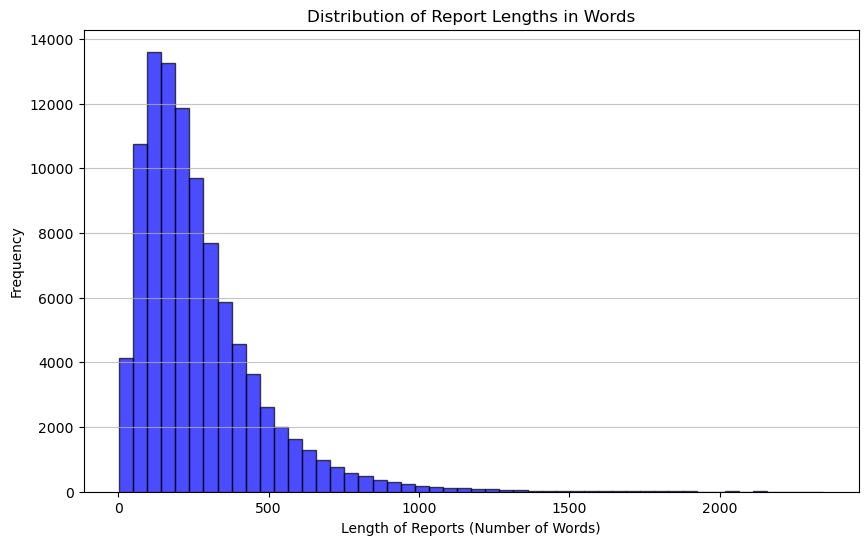

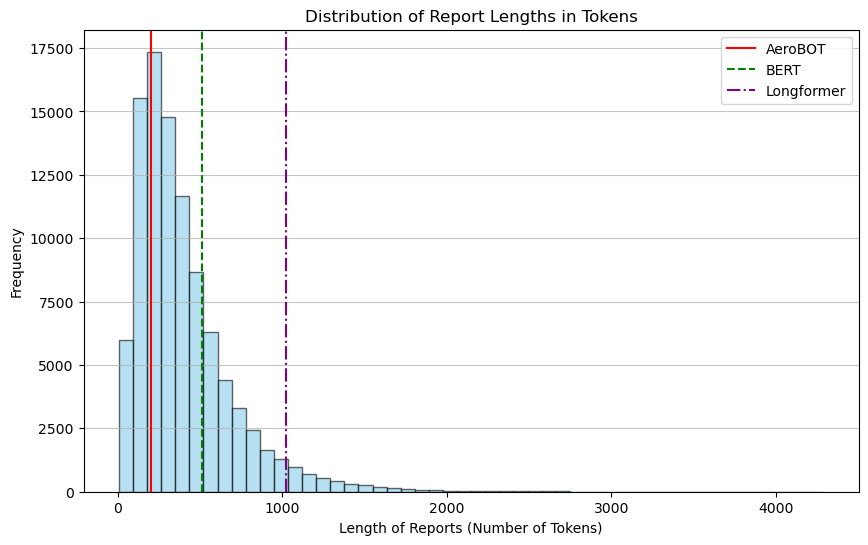

In [13]:
# Plot the distribution of narrative lengths in terms of number of words
plt.figure(figsize=(10, 6))
narrative_lengths = df['Narrative'].str.split().apply(lambda x: len(x) if x else 0)
plt.hist(narrative_lengths, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Report Lengths in Words')
plt.xlabel('Length of Reports (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot the distribution of narrative lengths in terms of number of tokens
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=50, color='skyblue', edgecolor='black', alpha=0.6)
plt.title('Distribution of Report Lengths in Tokens')
plt.xlabel('Length of Reports (Number of Tokens)')
plt.ylabel('Frequency')
plt.axvline(x=200, color='red', linestyle='-', label='AeroBOT')
plt.axvline(x=512, color='green', linestyle='--', label='BERT')
plt.axvline(x=1024, color='purple', linestyle='-.', label='Longformer')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [22]:
from collections import Counter

narratives = df['Narrative']

# Split the narratives into individual words and flatten the list
words = narratives.str.split().explode()

# Count the frequency of each word
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
most_common_words


[('the', 1002792),
 ('THE', 736790),
 ('I', 600609),
 ('to', 578605),
 ('and', 497578),
 ('TO', 396555),
 ('AND', 326530),
 ('was', 293387),
 ('a', 268287),
 ('of', 228102),
 ('WAS', 213531),
 ('A', 191266),
 ('that', 182379),
 ('we', 166070),
 ('on', 162369),
 ('OF', 162296),
 ('in', 160661),
 ('WE', 158041),
 ('for', 130389),
 ('THAT', 126980)]

In [25]:
processed_narrative = pd.read_pickle("data/train_data_processed2.pkl")
processed_words = processed_narrative.str.split().explode()

# Count the frequency of each word
processed_word_counts = Counter(processed_words)
common_processed_words = processed_word_counts.most_common(50)
common_processed_words

[('.', 1395735),
 (';', 888532),
 ('THE', 738146),
 ('I', 616999),
 ('TO', 397859),
 ('AND', 327963),
 ('WAS', 217244),
 ('A', 195267),
 ('OF', 162721),
 ('WE', 159508),
 ('ON', 130090),
 ('THAT', 129641),
 ('IN', 119136),
 ('aircraft', 111294),
 ('Flight', 108881),
 (')', 107840),
 ('Aircraft', 107626),
 ("'", 104068),
 ('AT', 102054),
 ('Runway', 97640),
 ('The', 96791),
 ('(', 96634),
 ('FOR', 92815),
 ('WITH', 82421),
 ('WERE', 82156),
 ('We', 80945),
 ('Control', 76712),
 ('NOT', 76519),
 ('Traffic', 75161),
 ('HAD', 72915),
 ('THIS', 66739),
 ('IT', 62283),
 ('Air', 61221),
 ('flight', 58907),
 ('AS', 56776),
 ('System', 56338),
 ('Officer', 54809),
 ('us', 52614),
 ('FROM', 51841),
 ('MY', 49633),
 ('Approach', 49079),
 ('would', 48586),
 ('Feet', 47570),
 ('AN', 46120),
 ('HE', 45788),
 ('approach', 45720),
 ('2', 44598),
 ('HAVE', 44466),
 ('IS', 44434),
 ('runway', 44159)]

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Download the set of stopwords from nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to remove stopwords and punctuation
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply the clean_text function to each narrative entry
narrative_data['Narrative_clean'] = narrative_data['Narrative'].dropna().apply(clean_text)
narrative_data['Narrative.1_clean'] = narrative_data['Narrative.1'].dropna().apply(clean_text)

# Now let's analyze word frequencies in the clean narratives
from collections import Counter

# Combine all the clean words into one list
all_words = list(narrative_data['Narrative_clean'].dropna().sum()) + list(narrative_data['Narrative.1_clean'].dropna().sum())

# Get the most common words and their counts
word_counts = Counter(all_words).most_common(20)

word_counts


[nltk_data] Downloading package punkt to /home/gonem/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/gonem/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: name 'narrative_data' is not defined

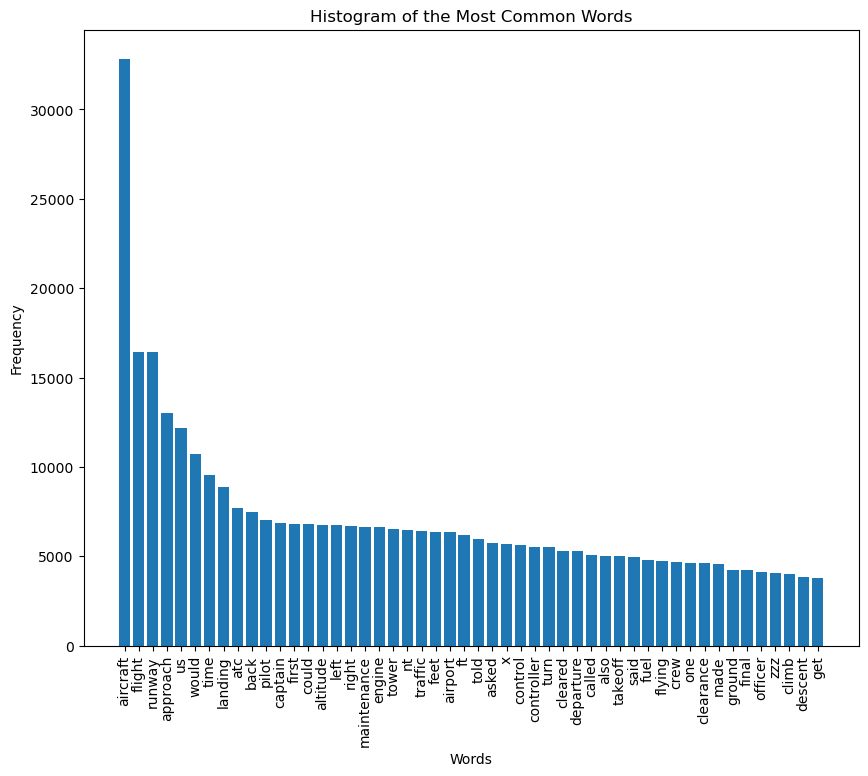

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'most_common_words' is a list of tuples like [('word1', count1), ('word2', count2), ...]

# Separate the words and their counts
words, counts = zip(*Counter(all_words).most_common(50))

# Create the bar chart (which will serve as a histogram for categorical data)
plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(words, counts)  # Create a bar chart with words on the x-axis and counts on the y-axis

# Add titles and labels
plt.title('Histogram of the Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them better

# Show the plot
plt.show()


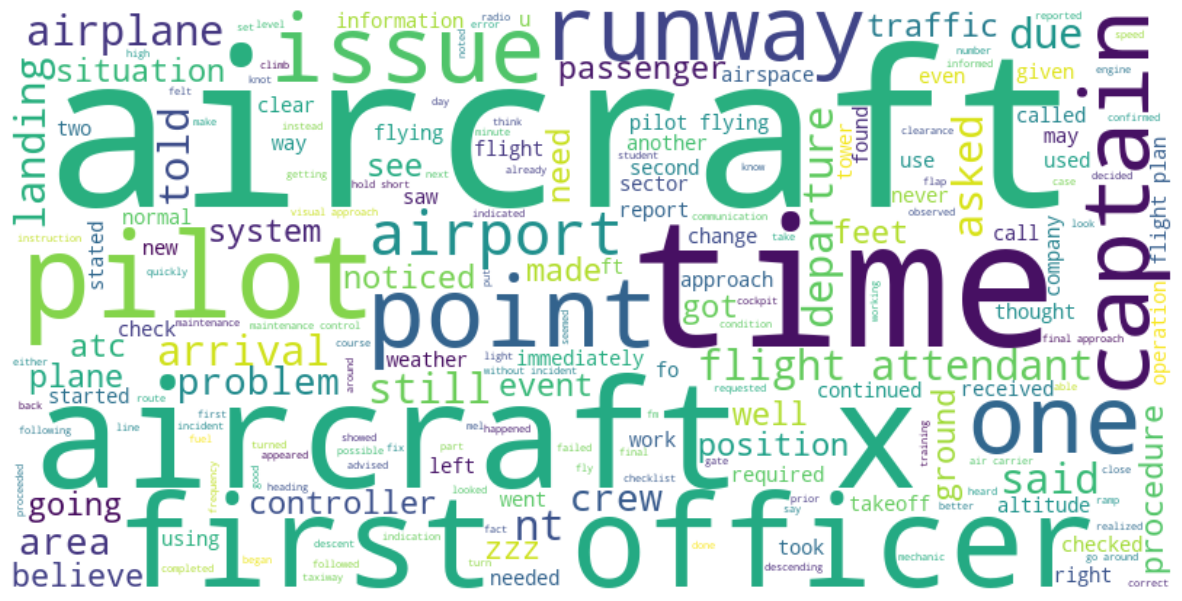

In [ ]:
from wordcloud import WordCloud

# Combine all narratives into one large text
combined_narratives = ' '.join(narrative_data['Narrative_clean'].dropna().sum())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_narratives)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [3]:
import numpy as np
def get_anomaly_counts(dataframe):
    # Convert the DataFrame column to a NumPy array of lists
    labels_list_array = np.array(dataframe['labels'])

    # Convert the array of lists to a NumPy array
    labels_array = np.vstack(labels_list_array)

    # Calculate the sum of each column and store it in a NumPy array
    anomaly_counts = np.sum(labels_array, axis=0)
    return anomaly_counts

In [4]:
from data_preprocessing import load_data, ANOMALY_LABELS, ANOMALY_SUBCATEGORIES


train_df = load_data("../data/train_data_final.pkl", ANOMALY_LABELS)
train_anomaly_counts = get_anomaly_counts(train_df)

test_df = load_data("../data/test_data_final.pkl", ANOMALY_LABELS)
test_anomaly_counts = get_anomaly_counts(test_df)

train_sub_df = load_data("../data/train_data_final.pkl", ANOMALY_SUBCATEGORIES)
train_sub_anomaly_counts = get_anomaly_counts(train_sub_df)

test_sub_df = load_data("../data/test_data_final.pkl", ANOMALY_SUBCATEGORIES)
test_sub_anomaly_counts = get_anomaly_counts(test_sub_df)


In [7]:
import matplotlib.pyplot as plt
def plot_anomaly_counts(labels, train_counts, test_counts, title):
    # Sort the counts and corresponding labels for the training data
    sorted_indices = np.argsort(train_counts)[::-1]
    sorted_train_counts = train_counts[sorted_indices]
    sorted_labels = np.array(labels)[sorted_indices]

    # Sort the counts for the test data according to the sorted labels of the training data
    sorted_test_counts = test_counts[sorted_indices]

    # Create figure and axis objects
    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Plot the training data counts
    ax1.bar(sorted_labels, sorted_train_counts, label='Train Data', color='b', width=0.4, align='center')

    # Create a second y-axis with the same x-axis
    ax2 = ax1.twinx()
    # Plot the test data counts
    ax2.bar(sorted_labels, sorted_test_counts, label='Test Data', color='r', alpha=0.6, width=0.4, align='edge')

    # Set the title and x-axis labels
    ax1.set_title(title)
    ax1.set_xlabel('Anomaly Type')
    ax1.set_ylabel('Frequency in Train Data')
    ax2.set_ylabel('Frequency in Test Data')

    # Rotate the x-axis labels for readability
    ax1.set_xticklabels(sorted_labels, rotation=90, fontsize=8)

    # Adjust layout
    fig.tight_layout()

    # Show the plot with a legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

/tmp/ipykernel_261186/4107902666.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_labels, rotation=90, fontsize=8)


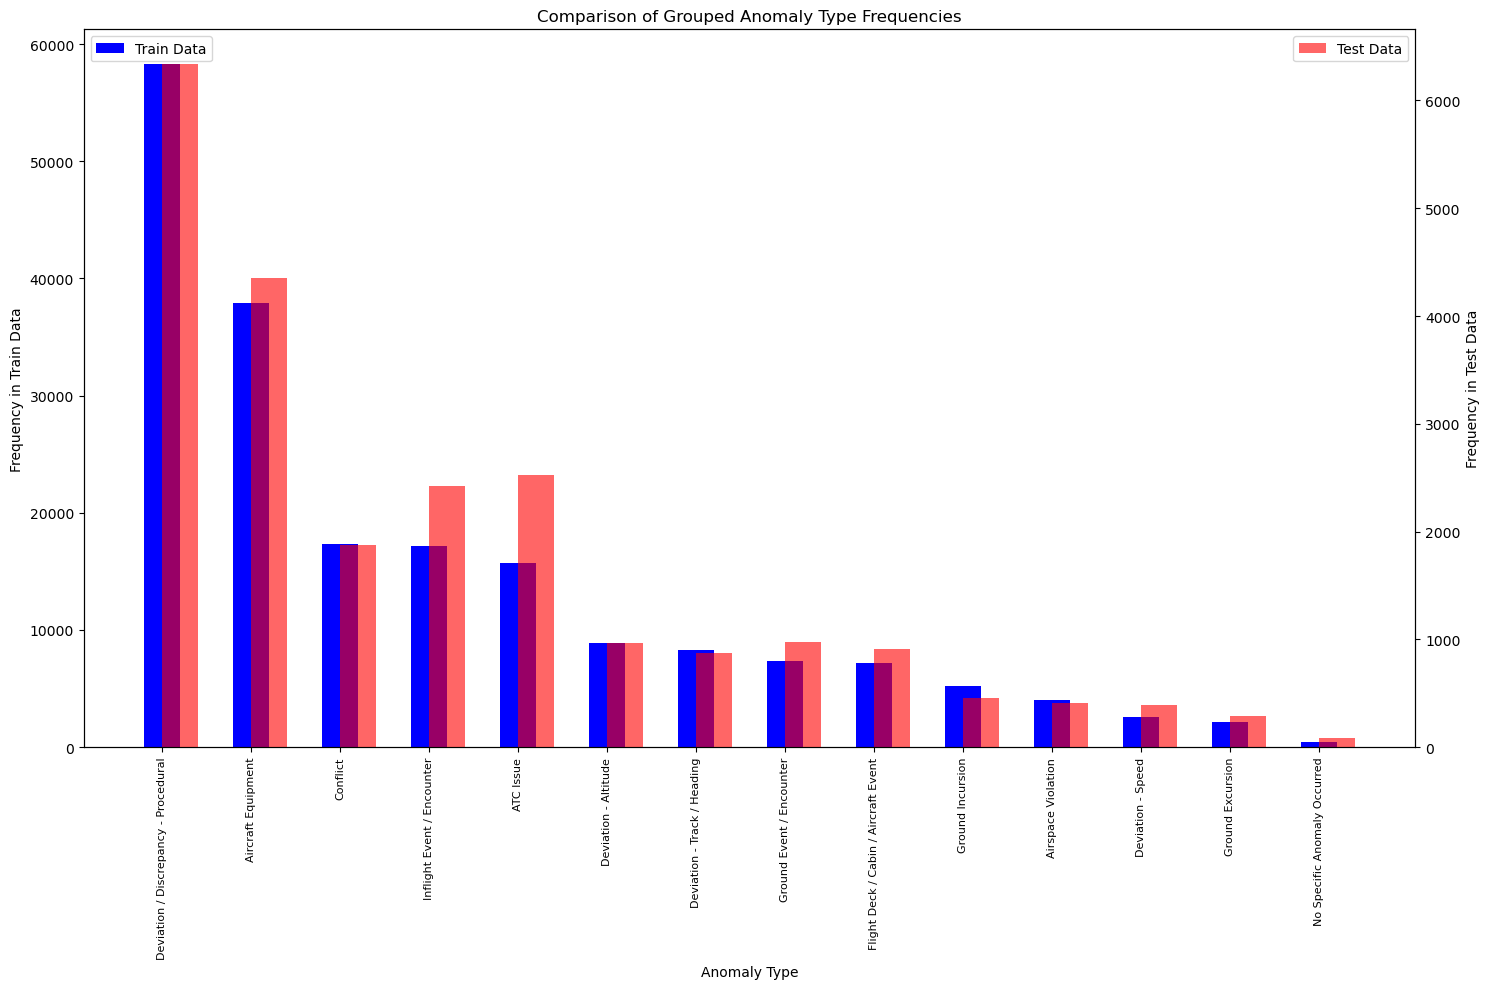

/tmp/ipykernel_261186/4107902666.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_labels, rotation=90, fontsize=8)


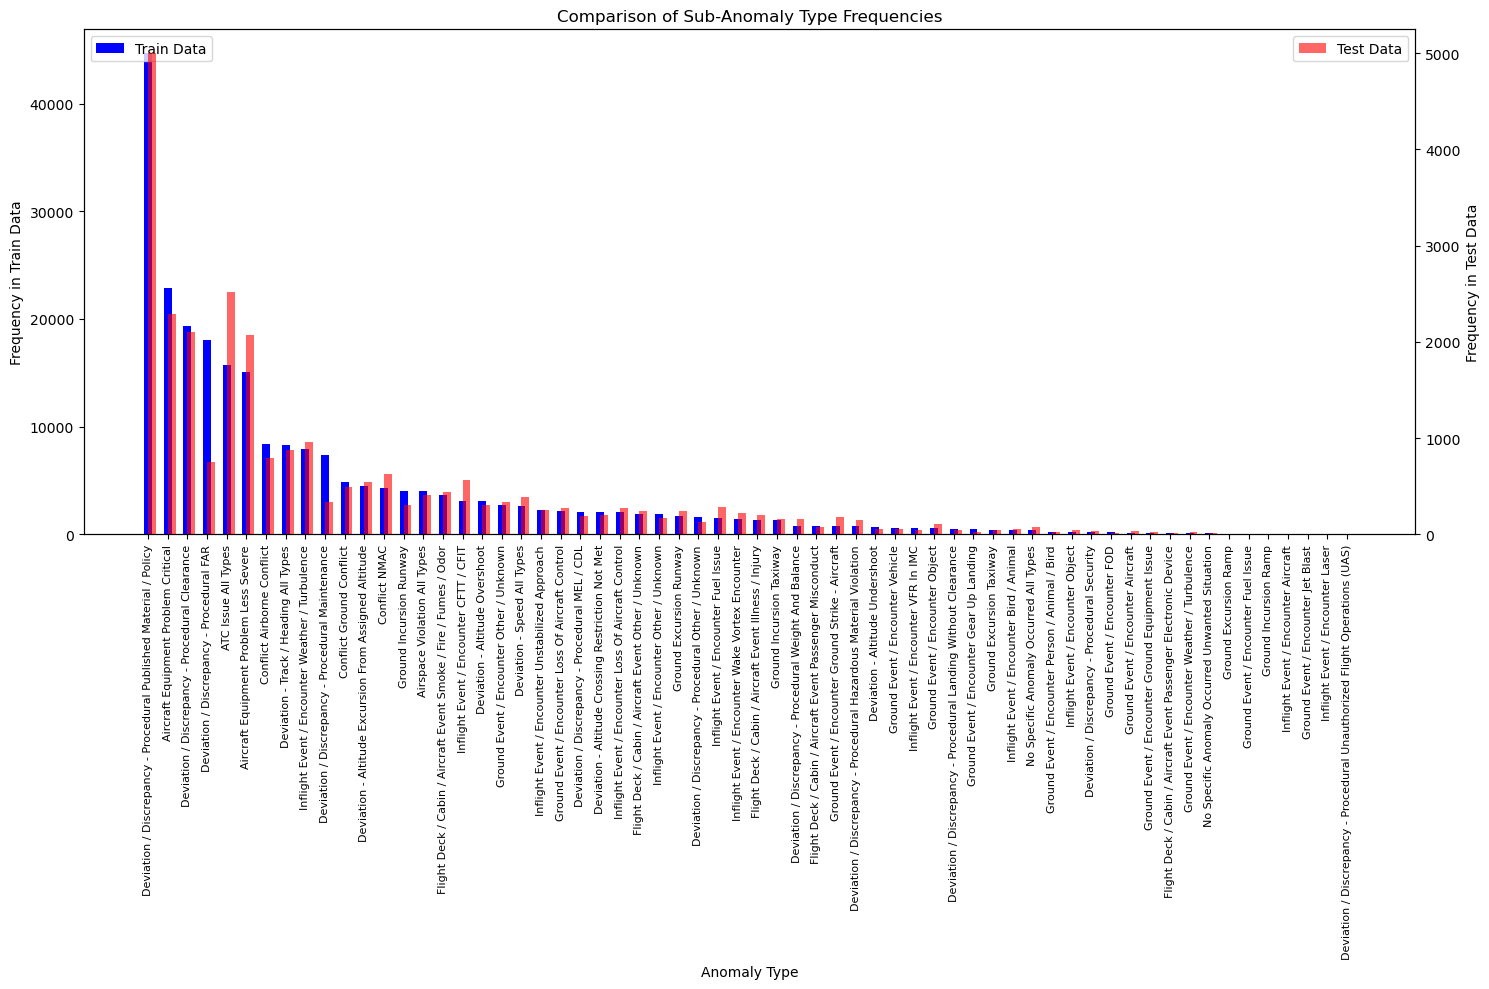

In [8]:
# Plot for grouped categories
plot_anomaly_counts(ANOMALY_LABELS, train_anomaly_counts, test_anomaly_counts, 'Comparison of Grouped Anomaly Type Frequencies')

# Plot for subcategories
plot_anomaly_counts(ANOMALY_SUBCATEGORIES, train_sub_anomaly_counts, test_sub_anomaly_counts, 'Comparison of Sub-Anomaly Type Frequencies')

/tmp/ipykernel_116176/2143463054.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_labels, rotation=90, fontsize=8)


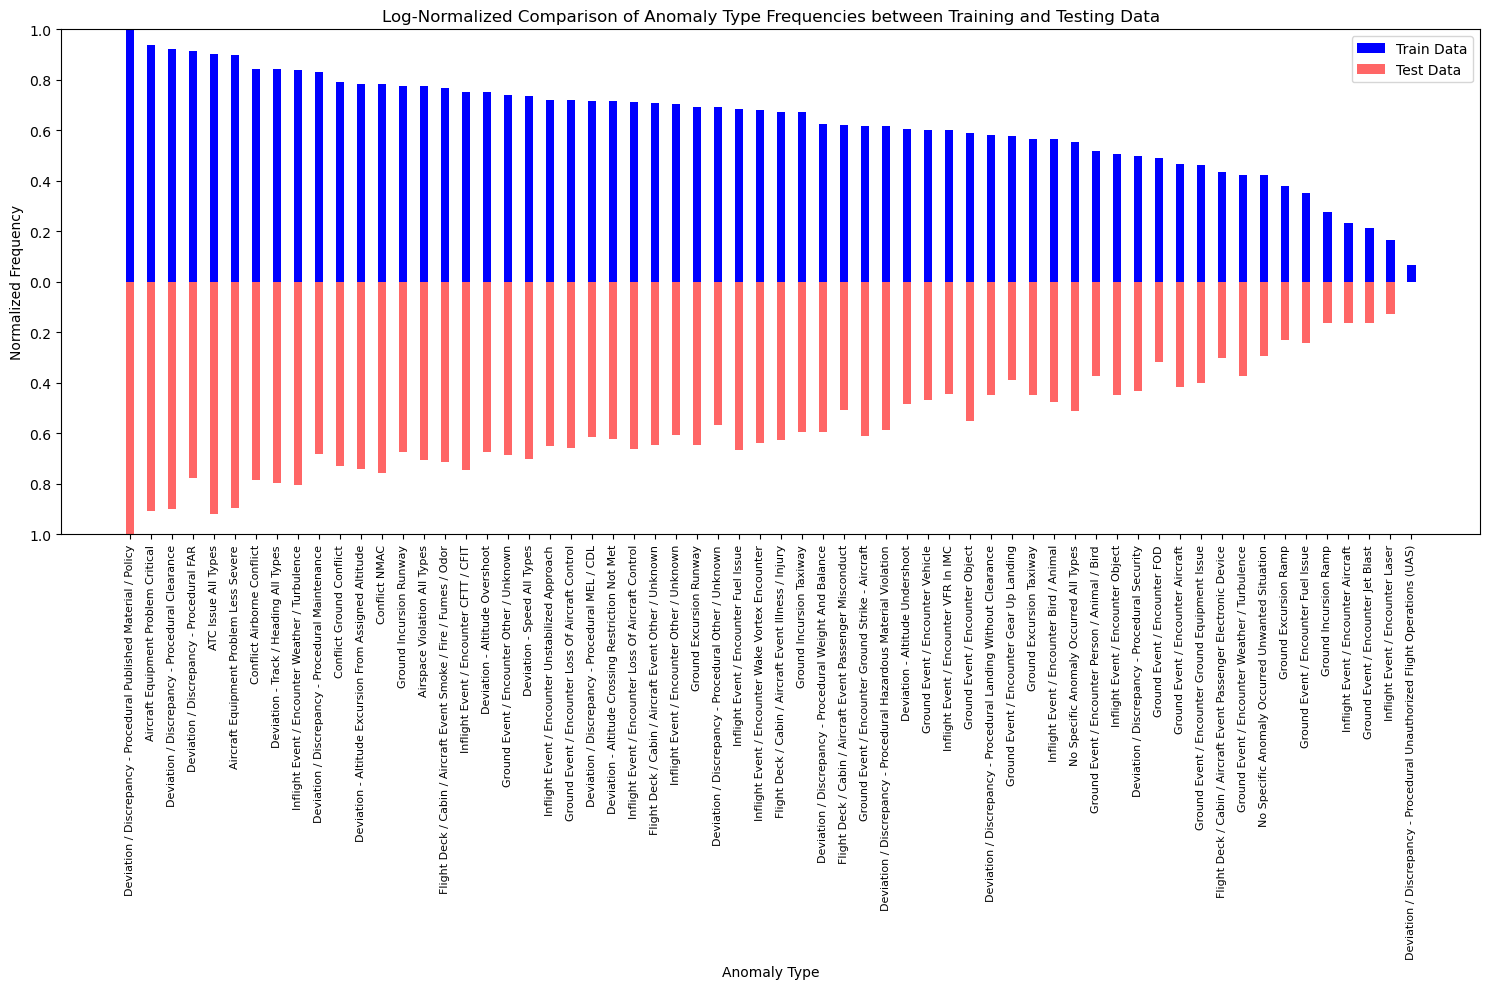

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation with a small constant to avoid log(0)
constant = 1
log_train_counts = np.log(train_sub_anomaly_counts + constant)
log_test_counts = np.log(test_sub_anomaly_counts + constant)

# Get sorted indices from the training data
sorted_indices = np.argsort(log_train_counts)[::-1]

# Apply the sorting to both training and test data
sorted_train_counts = log_train_counts[sorted_indices]
sorted_test_counts = log_test_counts[sorted_indices]
sorted_labels = np.array(ANOMALY_SUBCATEGORIES)[sorted_indices]

# Normalize the sorted data
normalized_train_counts = sorted_train_counts / sorted_train_counts.max()
normalized_test_counts = sorted_test_counts / sorted_test_counts.max()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the normalized training data counts on the positive side
ax1.bar(sorted_labels, normalized_train_counts, width=0.4, label='Train Data', color='b')

# Plot the normalized test data counts on the negative side (mirrored)
ax1.bar(sorted_labels, -normalized_test_counts, width=0.4, label='Test Data', color='r', alpha=0.6)

# Set the title and x-axis labels
ax1.set_title('Log-Normalized Comparison of Anomaly Type Frequencies between Training and Testing Data')
ax1.set_xlabel('Anomaly Type')
ax1.set_ylabel('Normalized Frequency')

# Rotate the x-axis labels to vertical for readability
ax1.set_xticklabels(sorted_labels, rotation=90, fontsize=8)

# Set the y-axis to show normalized values with positive and negative ticks
max_normalized_count = max(normalized_train_counts.max(), normalized_test_counts.max())
ax1.set_ylim([-max_normalized_count, max_normalized_count])
ax1.set_yticks(np.linspace(-1, 1, 11))
ax1.set_yticklabels([f"{abs(y):.1f}" for y in ax1.get_yticks()])

# Use tight layout to ensure everything fits without overlapping
fig.tight_layout()

# Add a legend to the plot
ax1.legend()

# Show the plot
plt.show()


In [27]:
# Count the number of occurrences of each anomaly
anomaly_counts = sorted_frequencies
anomaly_counts


Deviation / Discrepancy - Procedural    58337
Aircraft Equipment                      37932
Conflict                                17342
Inflight Event / Encounter              17203
ATC Issue                               15751
Deviation - Altitude                     8876
Deviation - Track / Heading              8279
Ground Event / Encounter                 7342
Flight Deck / Cabin / Aircraft Event     7147
Ground Incursion                         5249
Airspace Violation                       3997
Deviation - Speed                        2588
Other                                    2454
Ground Excursion                         2157
No Specific Anomaly Occurred              471
dtype: int64

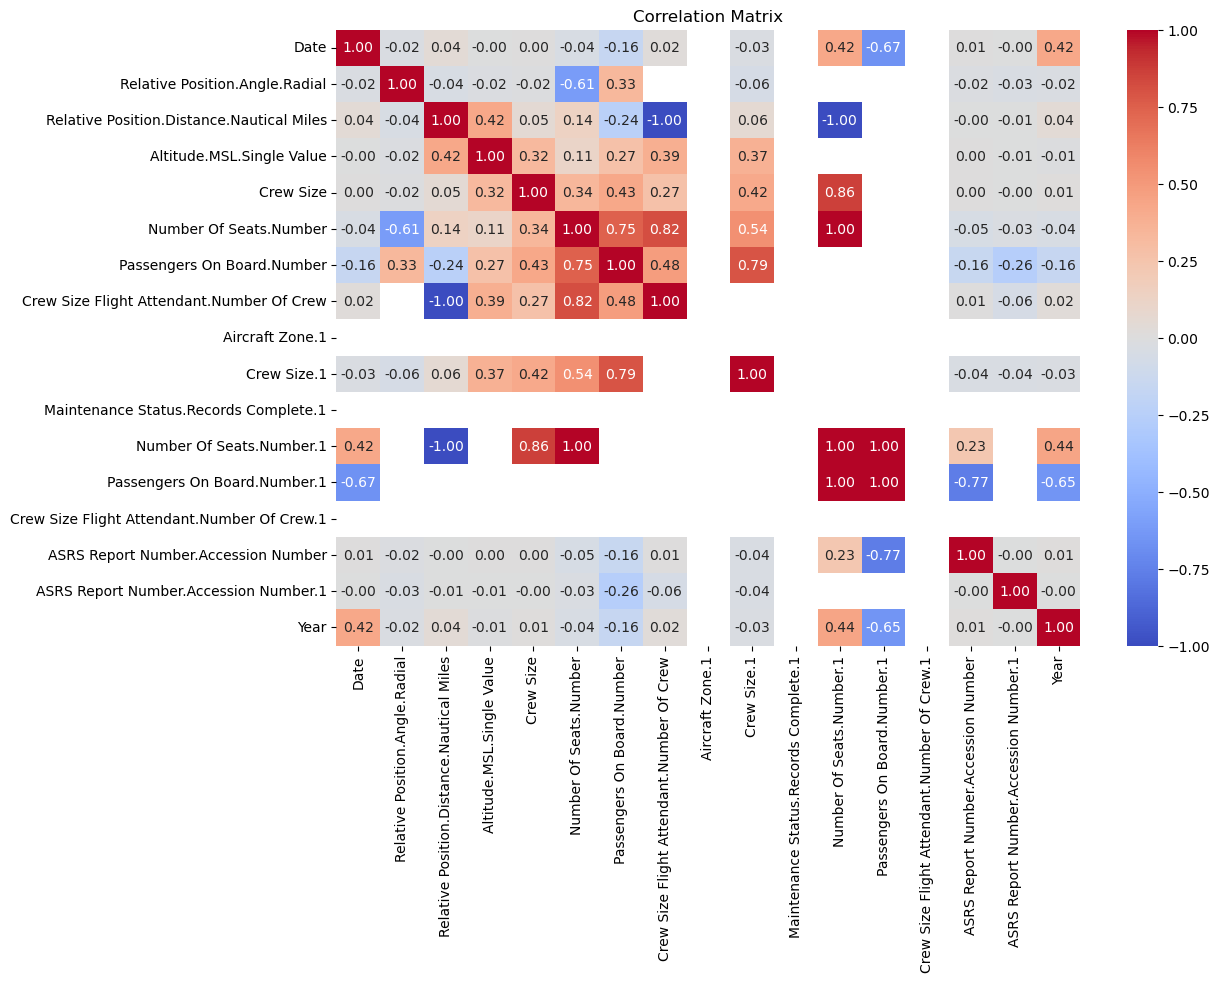

In [7]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=[np.number]).corr(min_periods=1)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
